# Looking at all detected faces and their probability in selected frames

In this notebook faces are detected and returned with their probability in selected frames.

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from IPython.display import *
from fastai.core import *
from fastai.vision import *
from kgl_deepfake.data import *
from kgl_deepfake.face_detection import *

In [ ]:
SOURCE = Path('../data/train_sample_videos/')

In [ ]:
f = get_files(SOURCE, extensions=['.json'])[0]
annots = pd.read_json(f).T
annots.reset_index(inplace=True)
annots.rename({'index':'fname'}, axis=1, inplace=True)
annots.head()

fname label  split        original
0  aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
1  aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
2  abarnvbtwb.mp4  REAL  train            None
3  abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
4  abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

### Example video: poor lighting

In [ ]:
fn = SOURCE/'czmqpxrqoh.mp4'  #'cdyakrxkia.mp4'
label = annots.label[annots.fname==fn.name].values[0]

In [ ]:
HTML(html_titled_vid(fn, label))

In [ ]:
facepipe = DetectionPipeline(nf=10)

In [ ]:
iframes, faces, probs = facepipe(fn, equalize=False)

* We almost don't detect a face at all.
* This is not a problem if we are just generating labeled images for training.  We could just get very few examples out of this video.
* This is a problem during inference, because what are we going to do if we don't get a single face out of the entire video.

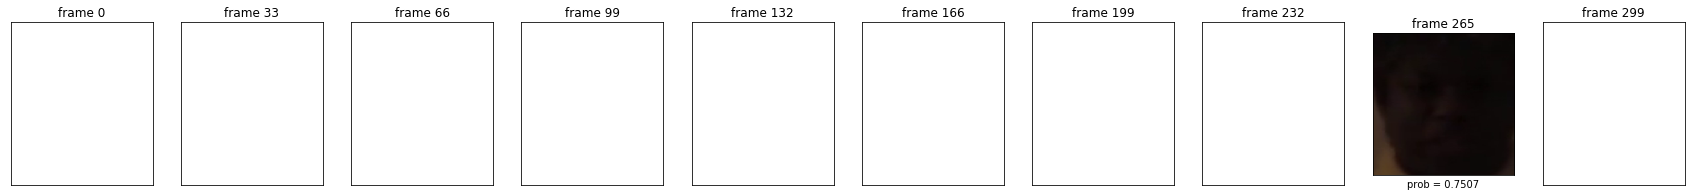

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

Applying constrast fix, all selected frames return a face.  Note that none of these have a probability greater or equal to 0.9.

In [ ]:
iframes, faces, probs = facepipe(fn, equalize=True)

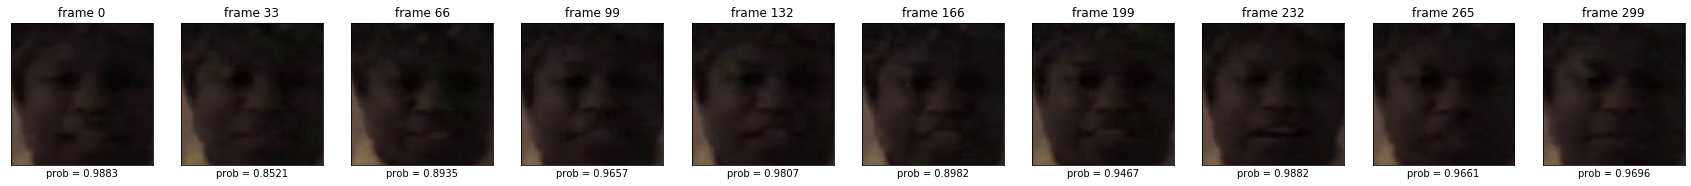

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

### Example video: Two guys, one wearing a t-shirt with a face on it

In [ ]:
idx = 345
fn = SOURCE/annots.fname[idx]
label = annots.label[idx]
HTML(html_titled_vid(fn, label)) 

In [ ]:
iframes, faces, probs = facepipe(fn)

* Face of the T-shirt is returned but not for all the frames.  These have probabilities less than 0.9.  
* The faces of the two people have probabilities above 0.999.  
* For the same frame, the faces are ordered by descending probability.

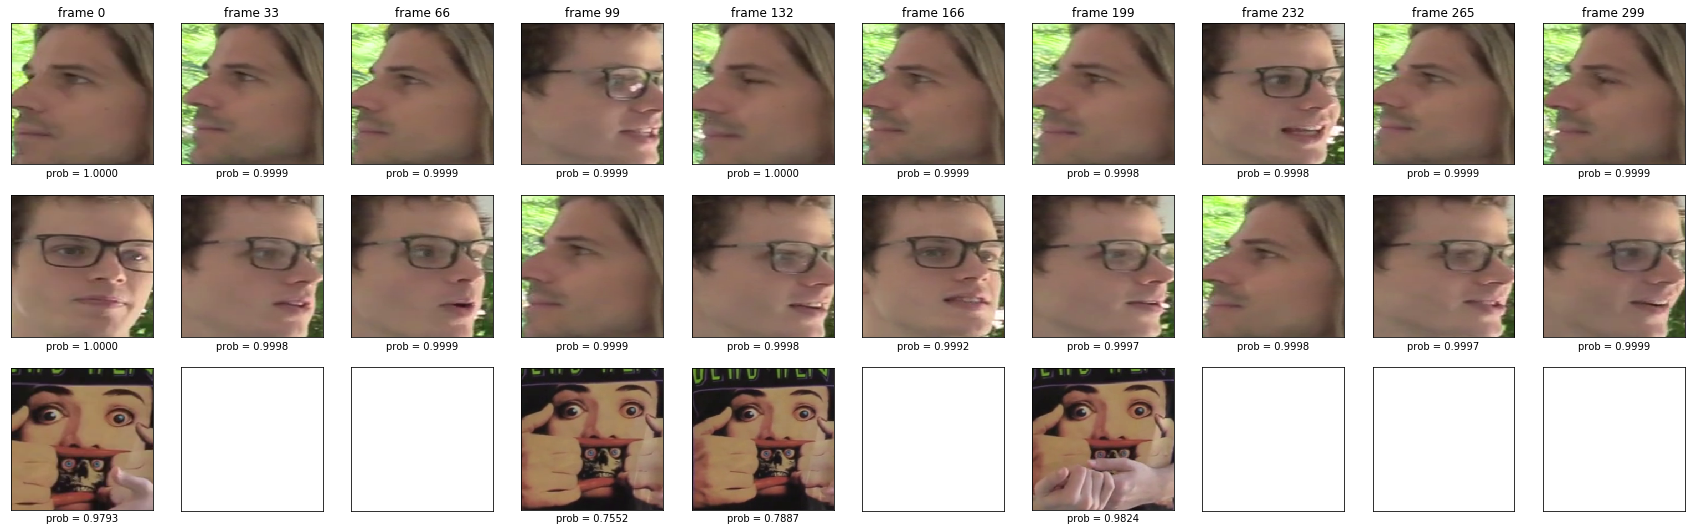

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

### Example video: Sinlge person with a very bad, blurry deepfaked face

In [ ]:
fn = SOURCE/'aorjvbyxhw.mp4'
label = annots.label[annots.fname==fn.name].values[0]
HTML(html_titled_vid(fn, label))

In [ ]:
iframes, faces, probs = facepipe(fn)

* Face is returned every frame.
* Probability for the face ranges from 0.89 to 0.99.
* Two non-faces are returned in two frames, with probabilities of 0.70 and 0.86.

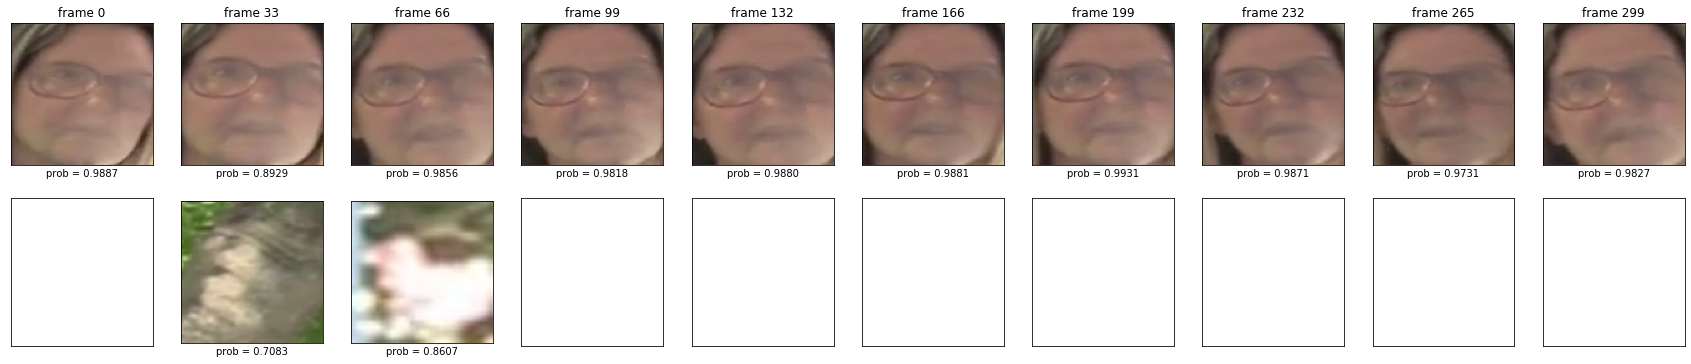

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

### Example Video: Person moving just in front of two protraits

In [ ]:
fn = SOURCE/'ebchwmwayp.mp4'
label = annots.label[annots.fname==fn.name].values[0]
HTML(html_titled_vid(fn, label))

Watch the video.

* The faces in the portraits are tracked in addition to the person's, though not as much.

In [ ]:
iframes, faces, probs = facepipe(fn)

* A portrait face can have comparable probabilities to the person's face, but they can be much lower, ~ 0.71.
* There is an image that is clearly not a face, with probability 0.82.

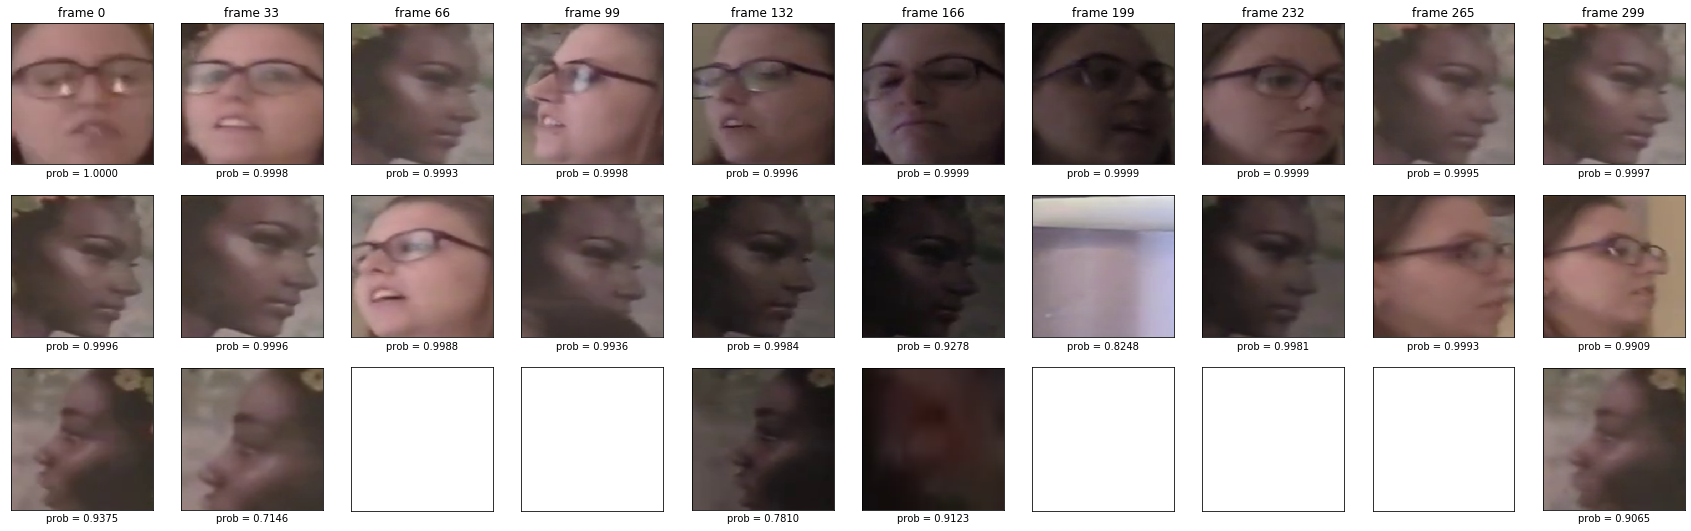

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

In [ ]:
iframes, faces, probs = facepipe(fn, equalize=True)

Let's apply contrast fix and detect again.

* In certain frames, there are now up to four faces.  Some of these are clearly not faces; they can have a probability as high as 0.94, and as low as 0.72.
* In some frames, the order of the faces changes.  

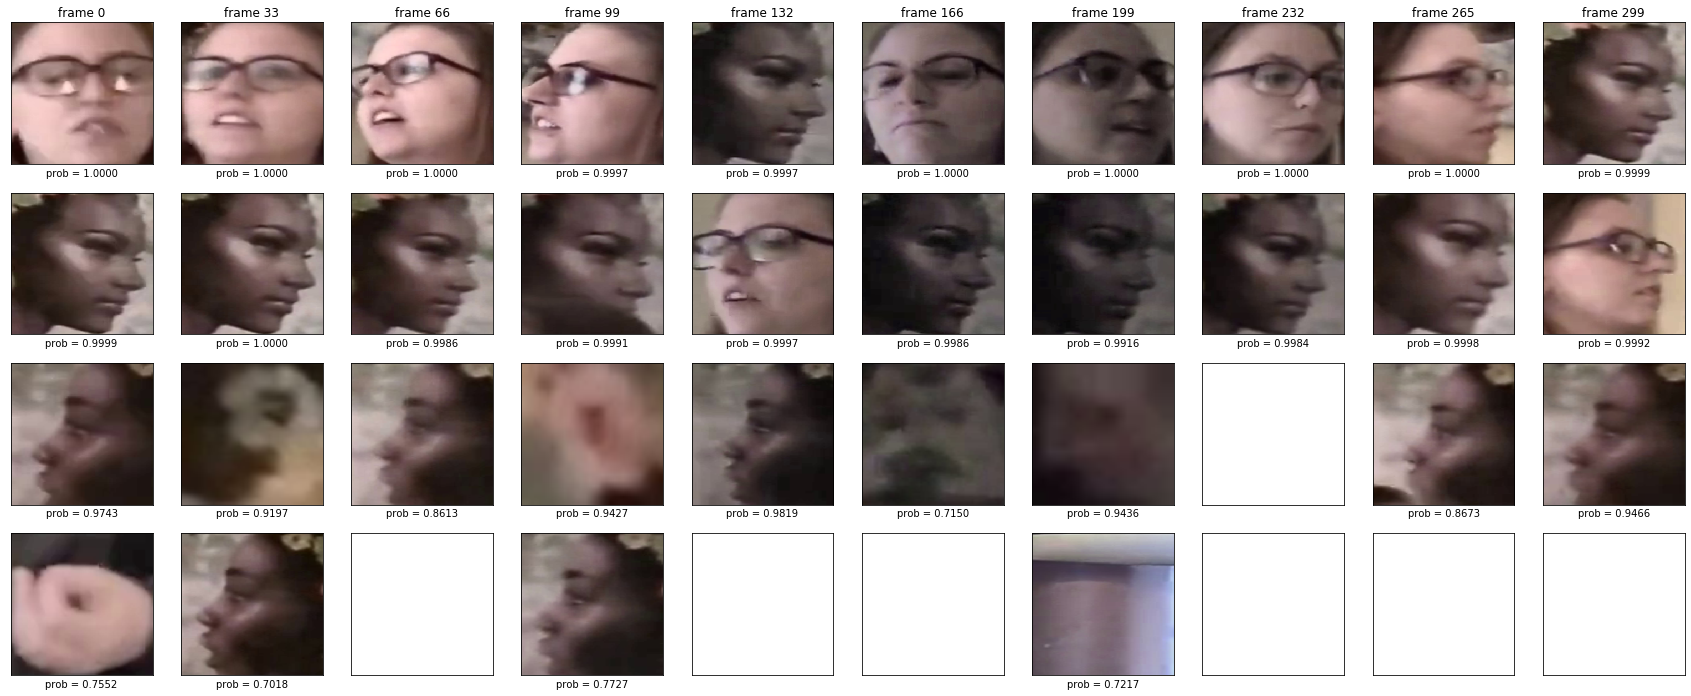

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

### Example video: person on sofa

In [ ]:
fn = SOURCE/'esnntzzajv.mp4'
label = annots.label[annots.fname==fn.name].values[0]
HTML(html_titled_vid(fn, label))

In [ ]:
iframes, faces, probs = facepipe(fn)

* A face is returned with probability 1 in every frame.

Thoughts
* The face in the video looks continuously fake, yet here it is returned by MTCNN with a probability of 1 in every selected frame.

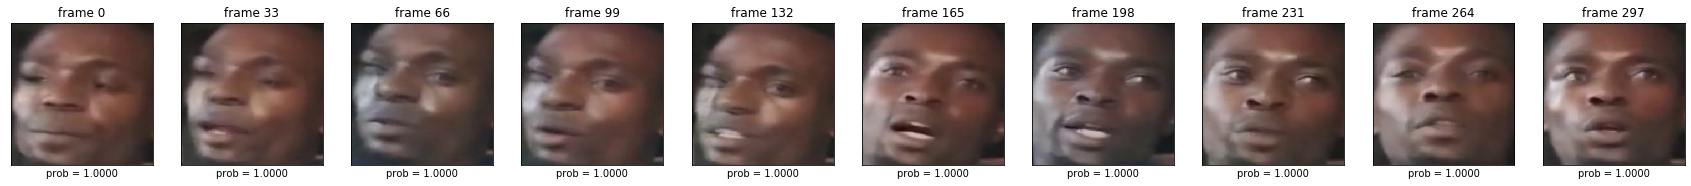

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

In [ ]:
iframes, faces, probs = facepipe(fn, equalize=True)

Applying constrast fix.

* Non-faces appear in a few frames.  These have probabilities from 0.70 to 0.80.

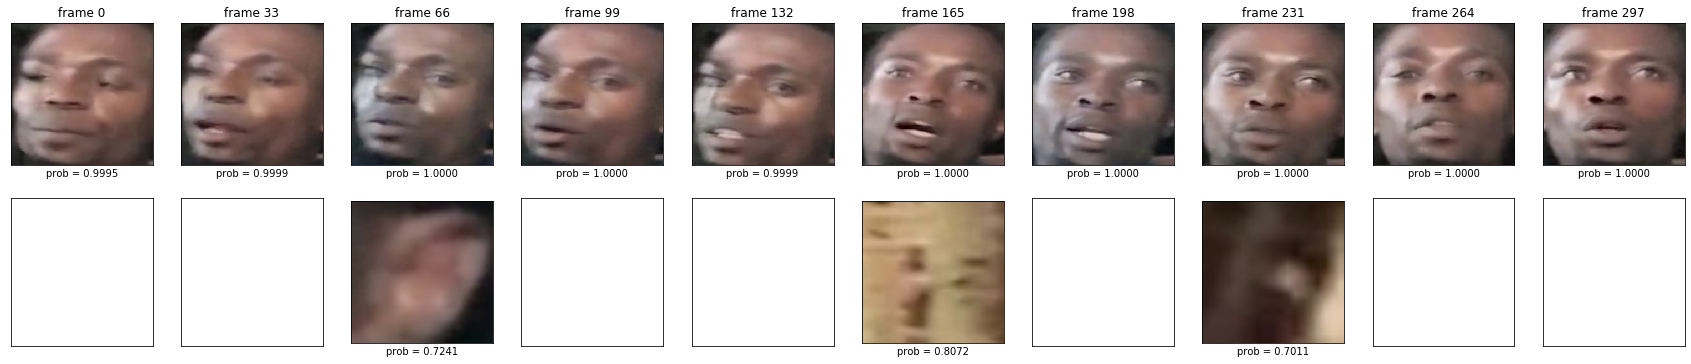

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

### Example Video: two people, one wearing t-shirt with face on it

In [ ]:
fn = SOURCE/'diuzrpqjli.mp4'
label = annots.label[annots.fname==fn.name].values[0]
HTML(html_titled_vid(fn, label))

Watch the video. 

* The face on the t-shirt is tracked in addition to those of the two people.
* The face of the person on the left is very blurry.
* The face tracking seems to mainly switch between the two people.

In [ ]:
iframes, faces, probs = facepipe(fn)

* Non-faces are returned with a probability of 0.93. 
* The t-shirt faces have probabilities between 0.71 - 0.97.

Thoughts  
* Can it be that, with the way the deepfake is applied here, the top row contains faces where the face tracking happened to be not applied. i.e. there is no deepfake effect at all in these images?
* Is it possible the second row and the third row contain most instances where the deepfake effect is actually present?

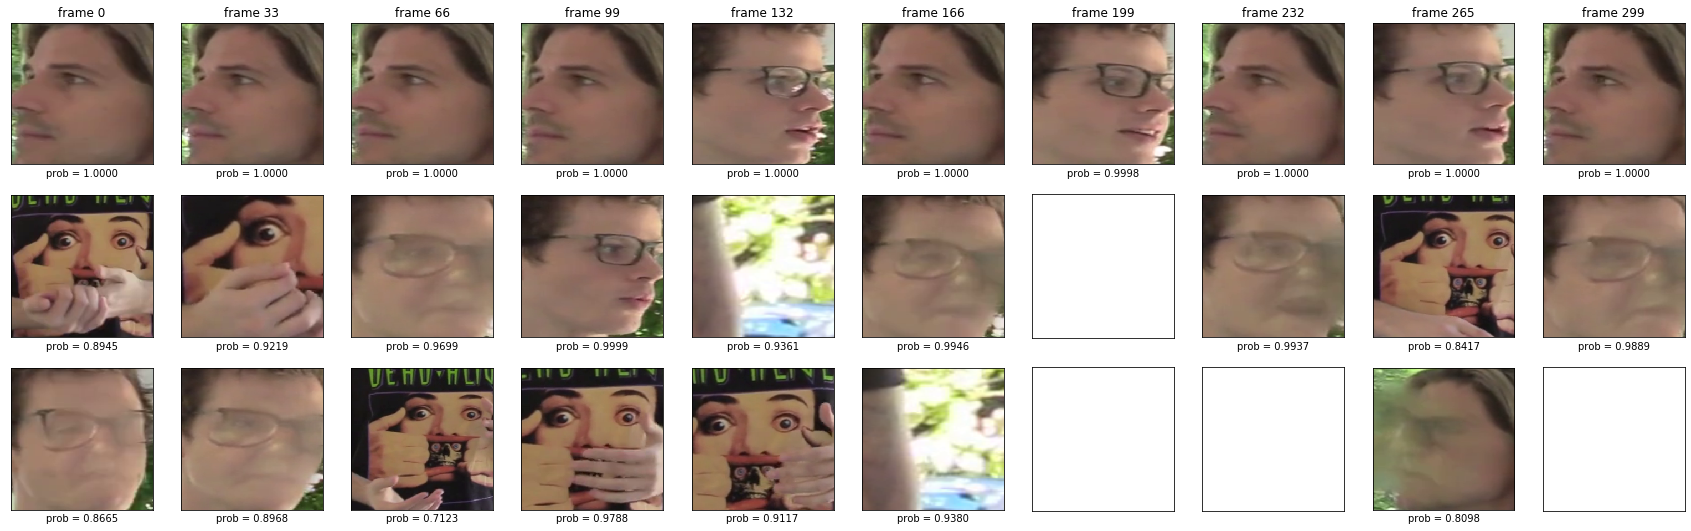

In [ ]:
_, _ = plt_frames_faces(iframes, faces, probs)

# -fin